# Database Application
---
**Author:** Jacob Redmon, Christina Porter 
**Version:** 1.5  
**Semester:** Spring 2021  
**Summary:**  

This project has two goals: 1) is for you to apply the exploratory analysis techniques you have learned this semester to prepare a dataset and 2) implement a machine learning (ML) model.

## I. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## II. Data Set Description

In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

The columns are in a sensible order, so no need to rearrange them.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The column `company` is mainly empty, so we will drop it entirely. To clean the rest of the data, we will drop any rows that have any empty data using the `dropna()` function. Next, we need to reset the index to compensate for the dropped rows. We now have `102894` rows, dropped from `119390`.

In [7]:
dfa = df.drop(columns='company')
dfa = dfa.dropna()
dfa = dfa.reset_index(drop=True)
len(dfa.index)

102894

In [8]:
dfa.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## III. Data Set Summary Statistics

In [9]:
dfb = dfa.describe().T
dfb

,count,mean,std,min,25%,50%,75%,max
is_canceled,102894.0,0.390314,0.487823,0.00,0.0,0.0,1.0,1.0
lead_time,102894.0,111.740092,107.681013,0.00,26.0,79.0,169.0,629.0
arrival_date_year,102894.0,2016.156977,0.706117,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,102894.0,27.339155,13.279990,1.00,17.0,28.0,38.0,53.0
arrival_date_day_of_month,102894.0,15.786771,8.794042,1.00,8.0,16.0,24.0,31.0
stays_in_weekend_nights,102894.0,0.978181,1.003991,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,102894.0,2.589655,1.905941,0.00,1.0,2.0,3.0,41.0
adults,102894.0,1.899926,0.490891,0.00,2.0,2.0,2.0,26.0
children,102894.0,0.111231,0.411982,0.00,0.0,0.0,0.0,10.0
babies,102894.0,0.007697,0.097089,0.00,0.0,0.0,0.0,10.0


Function to calculate the proportion for categorical variables.

In [10]:
def proportion(x):
    x = x / 102894 * 100
    return x

Function to generate CSV files for proportion tables for categorical variables.

In [11]:
def prop_table(x):
    dfc = dfa[x].groupby(dfa[x]).count().to_frame()
    dfc.insert(1, 'proportion', dfc[x].apply(proportion))
    dfc.to_csv('proportion_tables/'+ x + '_proportion.csv')
    return dfc

In [12]:
categorical = ['hotel', 'arrival_date_month', 'meal', 
               'country', 'market_segment', 'distribution_channel',
               'reserved_room_type', 'assigned_room_type', 'deposit_type', 
               'customer_type', 'reservation_status', 'reservation_status_date']

In [13]:
for x in categorical:
    prop_table(x)

In [14]:
dfd = dfa[['is_canceled', 'lead_time', 'arrival_date_year',
           'arrival_date_week_number', 'arrival_date_day_of_month',
           'stays_in_weekend_nights', 'stays_in_week_nights',
           'adults', 'babies', 'is_repeated_guest', 'previous_cancellations',
           'previous_bookings_not_canceled', 'booking_changes', 'agent', 
           'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 
           'total_of_special_requests']].corr()

In [15]:
dfd.to_csv('correlation_matrix.csv')

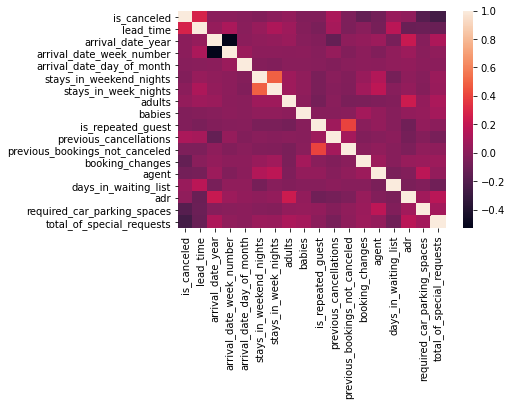

In [16]:
heatmap = sns.heatmap(dfd)
fig = heatmap.get_figure()

In [17]:
fig.savefig('corr_heatmap.png')

array([[<AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'days_in_waiting_list'}>],
       [<AxesSubplot:title={'center':'adr'}>,
    

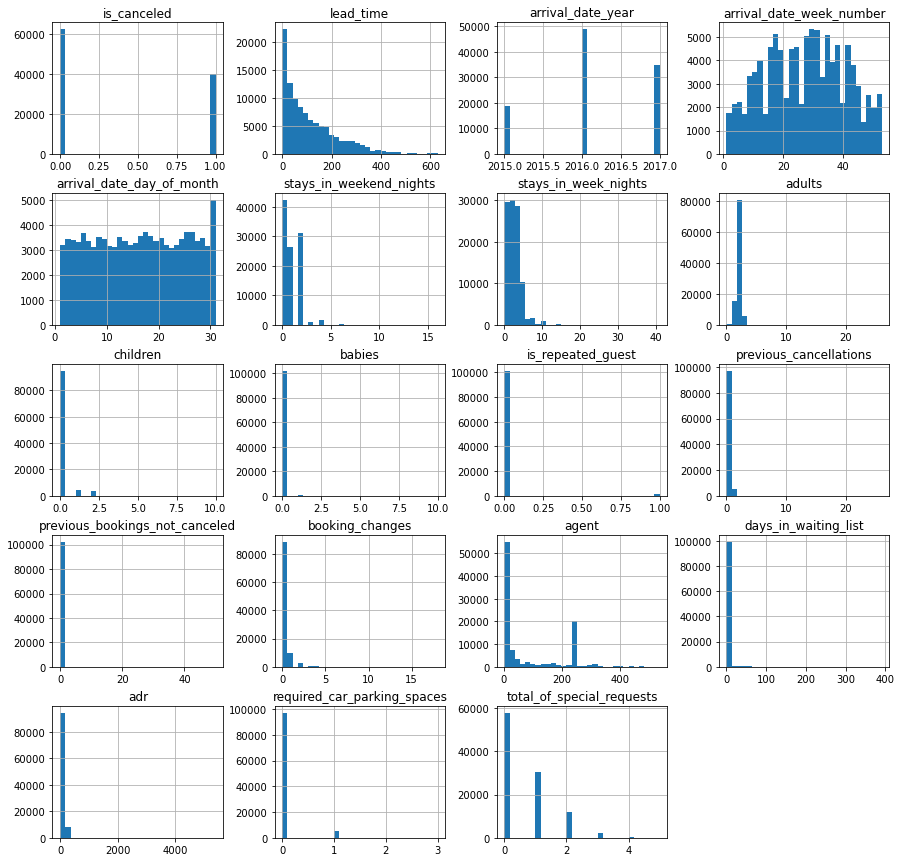

In [18]:
dfa.hist(bins=30, figsize=(15,15))

## IV. KNN Imports

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## V. Data KNN Exploration

For this analysis, We wanted to see if we could predict which hotel bookings might be cancelled. To use this, we decided to use the K nearest neighbor analysis because we wanted to see if we could train data from bookings that have already been cancelled.

In [18]:
dfa["is_canceled"].unique()

array([0, 1], dtype=int64)

In [19]:
dfa["reserved_room_type"].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'H', 'B'], dtype=object)

In [20]:
dfa["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [21]:
dfa["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [22]:
dfa["agent"].unique()

array([304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175., 134.,
       156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,   2.,
       127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167., 300.,
       171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,  29.,
       258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208., 256.,
       314., 126., 281., 273., 253., 185., 330., 334., 328., 326., 321.,
       324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348., 310.,
       339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257., 393.,
       168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1., 201.,
       183., 223., 368., 336., 291., 464., 411., 481.,  10., 154., 468.,
       410., 390., 440., 495., 492., 493., 434.,  57., 531., 420., 483.,
       526., 472., 429.,  16.,  34., 252., 270.,  47., 114., 301., 193.,
       182., 135., 350., 195., 352., 355., 159., 139., 363., 384., 360.,
       331., 367.,  64.,  78., 406., 163., 414., 33

In [23]:
dfa["distribution_channel"].unique()

array(['Corporate', 'TA/TO', 'Direct', 'GDS'], dtype=object)

In [24]:
dfa["is_canceled"].dtype

dtype('int64')

## VI. KNN Classification

For this classification, I'm curious to see whether factors like the hotel type, lead time, the number of children, the number of babies, country, booking changes, repeated guests, previous cancellations, deposit type, or customer type can be good predictors as to whether a hotel booking is cancelled or not.

### i. Classification by Party Division

In [25]:
X = np.array(dfa[['adults','children','babies']])
y = np.array(dfa['is_canceled'])

In [26]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.50, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.50, random_state=42)

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [28]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

### ii. Validation by Party Division

In [29]:
y_validate_pred = knn_model.predict(x_validate)

In [30]:
y_validate_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [32]:
print(accuracy, precision, recall, f1)

0.6070442794386347 0.455470737913486 0.03566447499501893 0.06614929785661494


### iii. Test by Party Division

In [33]:
y_pred = knn_model.predict(x_test)

In [34]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [35]:
print(accuracy, precision, recall, f1)

0.6072928004975898 0.4624113475177305 0.032441038909344216 0.06062860331039613


### iv. Changing Data Split for Party Division

In [36]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.25, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.25, random_state=42)

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [38]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
y_validate_pred = knn_model.predict(x_validate)

In [40]:
y_validate_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [42]:
print(accuracy, precision, recall, f1)

0.5592702016275333 0.3555488540410133 0.1562624254473161 0.21710708037933893


In [43]:
y_pred = knn_model.predict(x_test)

In [44]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [45]:
print(accuracy, precision, recall, f1)

0.5650754159539729 0.3787489288774636 0.1758154335719968 0.24015213257267046


### v. Changing Neighbor Size for Party Division - half learn

In [91]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.50, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.50, random_state=42)

In [92]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [93]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [94]:
y_validate_pred = knn_model.predict(x_validate)

In [95]:
y_validate_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [97]:
print(accuracy, precision, recall, f1)

0.6070442794386347 0.455470737913486 0.03566447499501893 0.06614929785661494


In [98]:
y_pred = knn_model.predict(x_test)

In [99]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [100]:
print(accuracy, precision, recall, f1)

0.6072928004975898 0.46219686162624823 0.03224201413075928 0.06027906976744186


### vi. Changing Neighbor Size for Party Division - quarter learn

In [102]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.25, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.25, random_state=42)

In [103]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [104]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [105]:
y_validate_pred = knn_model.predict(x_validate)

In [106]:
y_validate_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [108]:
print(accuracy, precision, recall, f1)

0.6084590265899549 0.4430379746835443 0.004638833664678595 0.009181532004197274


In [109]:
y_pred = knn_model.predict(x_test)

In [110]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [111]:
print(accuracy, precision, recall, f1)

0.6081480329653242 0.40625 0.005171042163882259 0.010212097407698349


### vii. Classification by Booking Length

In [112]:
dfa.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [117]:
X = np.array(dfa[['lead_time','stays_in_week_nights','stays_in_weekend_nights']])
y = np.array(dfa['is_canceled'])

In [118]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.50, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.50, random_state=42)

In [119]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [120]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

### ii. Validation by Booking Length

In [121]:
y_validate_pred = knn_model.predict(x_validate)

In [122]:
y_validate_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [123]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [124]:
print(accuracy, precision, recall, f1)

0.695369902421957 0.6286214953271028 0.5360629607491533 0.5786643725131734


### iii. Test by Booking Length

In [125]:
y_pred = knn_model.predict(x_test)

In [126]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [127]:
print(accuracy, precision, recall, f1)

0.6982584357020681 0.6382207179983077 0.5254254154642253 0.5763562929811156


### iv. Changing Data Split for Booking Length

In [128]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.25, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.25, random_state=42)

In [129]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [130]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [131]:
y_validate_pred = knn_model.predict(x_validate)

In [132]:
y_validate_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [133]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [134]:
print(accuracy, precision, recall, f1)

0.7008759653760431 0.6395531780994336 0.5387673956262425 0.5848500107905905


In [135]:
y_pred = knn_model.predict(x_test)

In [136]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [137]:
print(accuracy, precision, recall, f1)

0.7011351267299021 0.6393596986817326 0.5401750198886237 0.5855972401897369


### v. Changing Neighbor Size for Booking Length - half learn

In [138]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.50, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.50, random_state=42)

In [139]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [140]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [141]:
y_validate_pred = knn_model.predict(x_validate)

In [142]:
y_validate_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [143]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [144]:
print(accuracy, precision, recall, f1)

0.7069159895813085 0.6891176025427577 0.45357640964335527 0.5470711925503154


In [145]:
y_pred = knn_model.predict(x_test)

In [146]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [147]:
print(accuracy, precision, recall, f1)

0.7084823511118022 0.69489452766738 0.4523833217235546 0.5480079561207883


### vi. Changing Neighbor Size for Booking Length - quarter learn

In [148]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.25, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.25, random_state=42)

In [149]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [150]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [151]:
y_validate_pred = knn_model.predict(x_validate)

In [152]:
y_validate_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [153]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [154]:
print(accuracy, precision, recall, f1)

0.719017260146167 0.7148927559692432 0.4682571239231279 0.565868503243373


In [155]:
y_pred = knn_model.predict(x_test)

In [156]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [157]:
print(accuracy, precision, recall, f1)

0.7106204322811382 0.6965683323299218 0.4602227525855211 0.5542514970059881
